In [7]:
import warnings
warnings.filterwarnings('ignore')

%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

plt.style.use('fivethirtyeight')

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
Suburb           34857 non-null object
Address          34857 non-null object
Rooms            34857 non-null int64
Type             34857 non-null object
Price            27247 non-null float64
Method           34857 non-null object
SellerG          34857 non-null object
Date             34857 non-null object
Distance         34856 non-null float64
Postcode         34856 non-null float64
Bedroom2         26640 non-null float64
Bathroom         26631 non-null float64
Car              26129 non-null float64
Landsize         23047 non-null float64
BuildingArea     13742 non-null float64
YearBuilt        15551 non-null float64
CouncilArea      34854 non-null object
Lattitude        26881 non-null float64
Longtitude       26881 non-null float64
Regionname       34854 non-null object
Propertycount    34854 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.6+ M

In [4]:
cat = []
num = []

for i in df.columns:
    if df[i].dtype == 'object':
        cat.append(i)
    else:
        num.append(i)

df[num].describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.03,0.97,1.00,2.00,3.00,4.00,16.00
Price,27247.0,1050173.34,641467.13,85000.00,635000.00,870000.00,1295000.00,11200000.00
Distance,34856.0,11.18,6.79,0.00,6.40,10.30,14.00,48.10
Postcode,34856.0,3116.06,109.02,3000.00,3051.00,3103.00,3156.00,3978.00
Bedroom2,26640.0,3.08,0.98,0.00,2.00,3.00,4.00,30.00
Bathroom,26631.0,1.62,0.72,0.00,1.00,2.00,2.00,12.00
Car,26129.0,1.73,1.01,0.00,1.00,2.00,2.00,26.00
Landsize,23047.0,593.60,3398.84,0.00,224.00,521.00,670.00,433014.00
BuildingArea,13742.0,160.26,401.27,0.00,102.00,136.00,188.00,44515.00
YearBuilt,15551.0,1965.29,37.33,1196.00,1940.00,1970.00,2000.00,2106.00


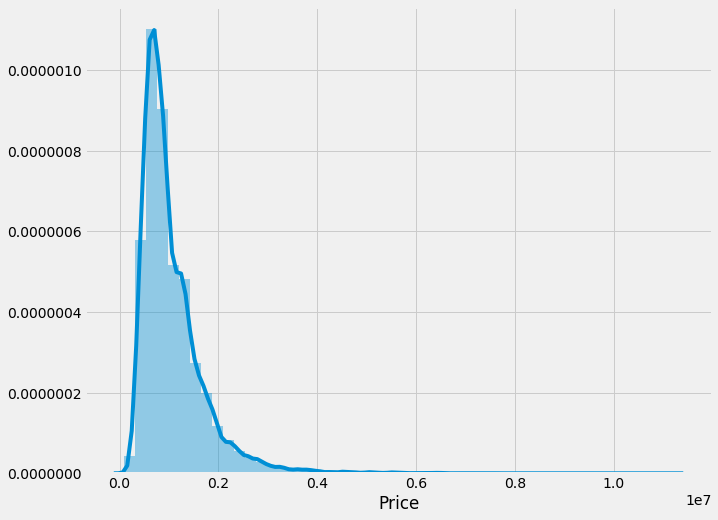

In [9]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price'].dropna());

Цены на жилье сильно скоршены вправо - есть дорогие варианты. Попробую прологарифмировать и сравнить с нормальным распределением.

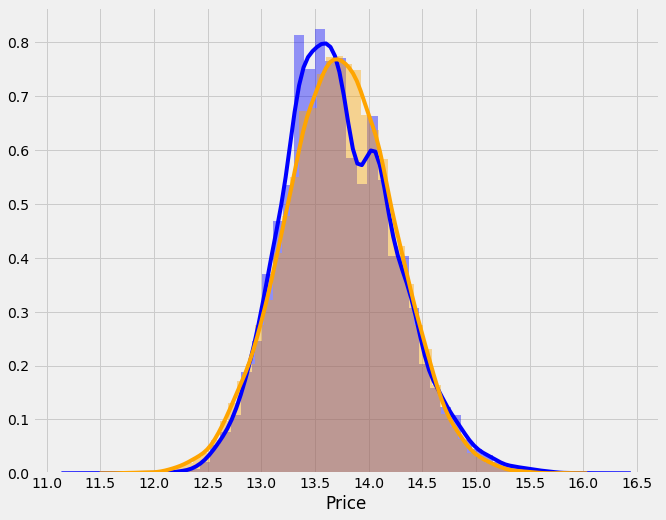

In [10]:
normal = np.random.normal(np.mean(np.log(df['Price'].dropna()))
                          , np.std(np.log(df['Price'].dropna()))
                          , size = len(df['Price'].dropna()))

plt.figure(figsize=(10,8))
sns.distplot(np.log(df['Price']).dropna(), label= 'price', color = 'blue')
sns.distplot(normal, label= 'normal', color = 'orange')
plt.xticks(np.arange(11,17,0.5));

Распределения, в целом, схожи. Оценим на какой цене наблюдается всплеск.

In [11]:
print(np.exp(14).round(2), '$')

1202604.28 $


Выведу корр. матрицу для анализа скореллированных признаков.

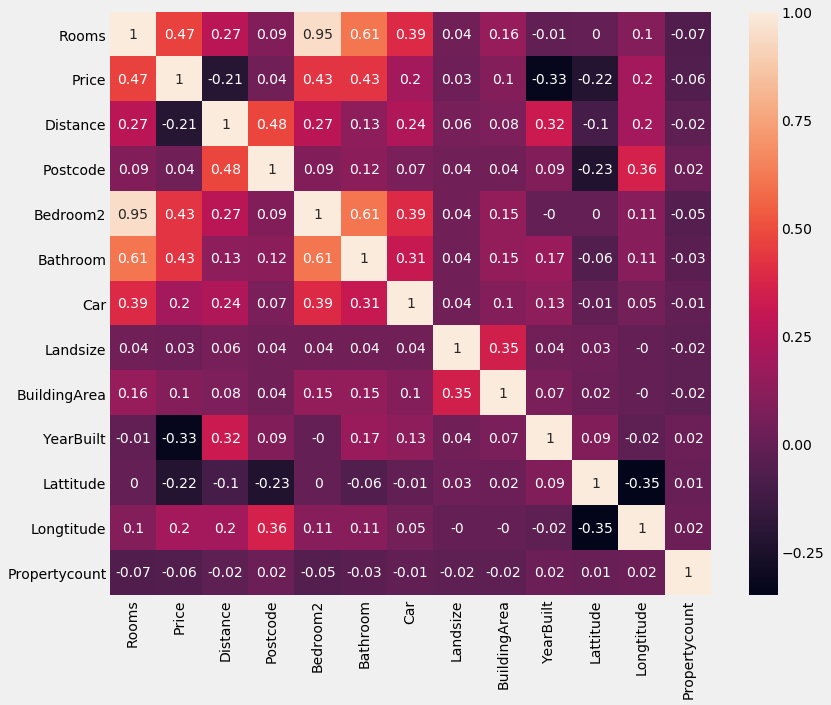

In [12]:
plt.figure(figsize = (12,10))

sns.heatmap(df.corr().round(2), annot=True);

Сильно скореллированы Room и Bedroom2, что выглядит логично. Так же высокая корелляция у BathRoom и Rooms/Bedrooms.
Вероятно, имеет смысл удалить те данные, в которых больше пропусков.

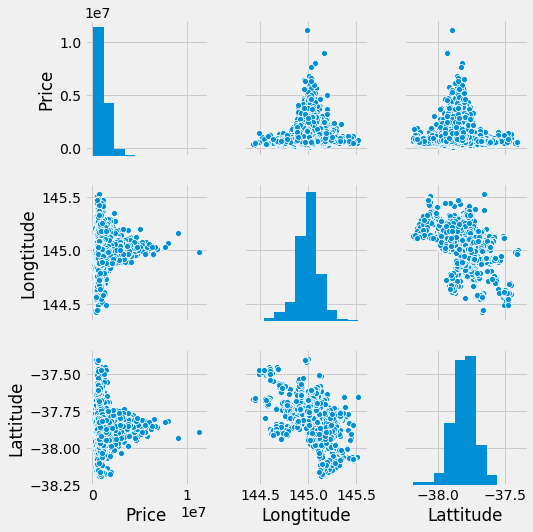

In [13]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['Price', 'Longtitude','Lattitude']].dropna());

In [14]:
num

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

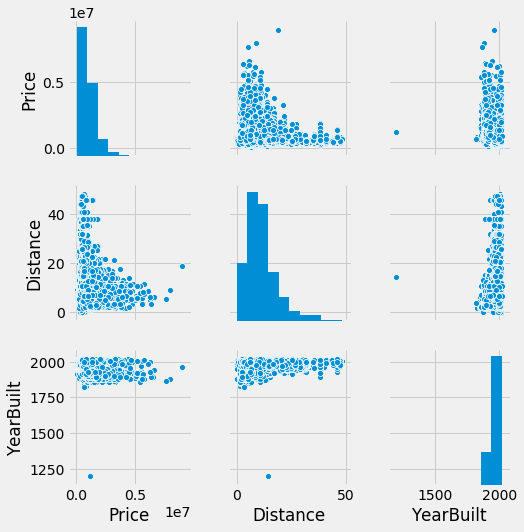

In [15]:
plt.figure(figsize = (10,8))
sns.pairplot(df[['Price', 'Distance','YearBuilt']].dropna());

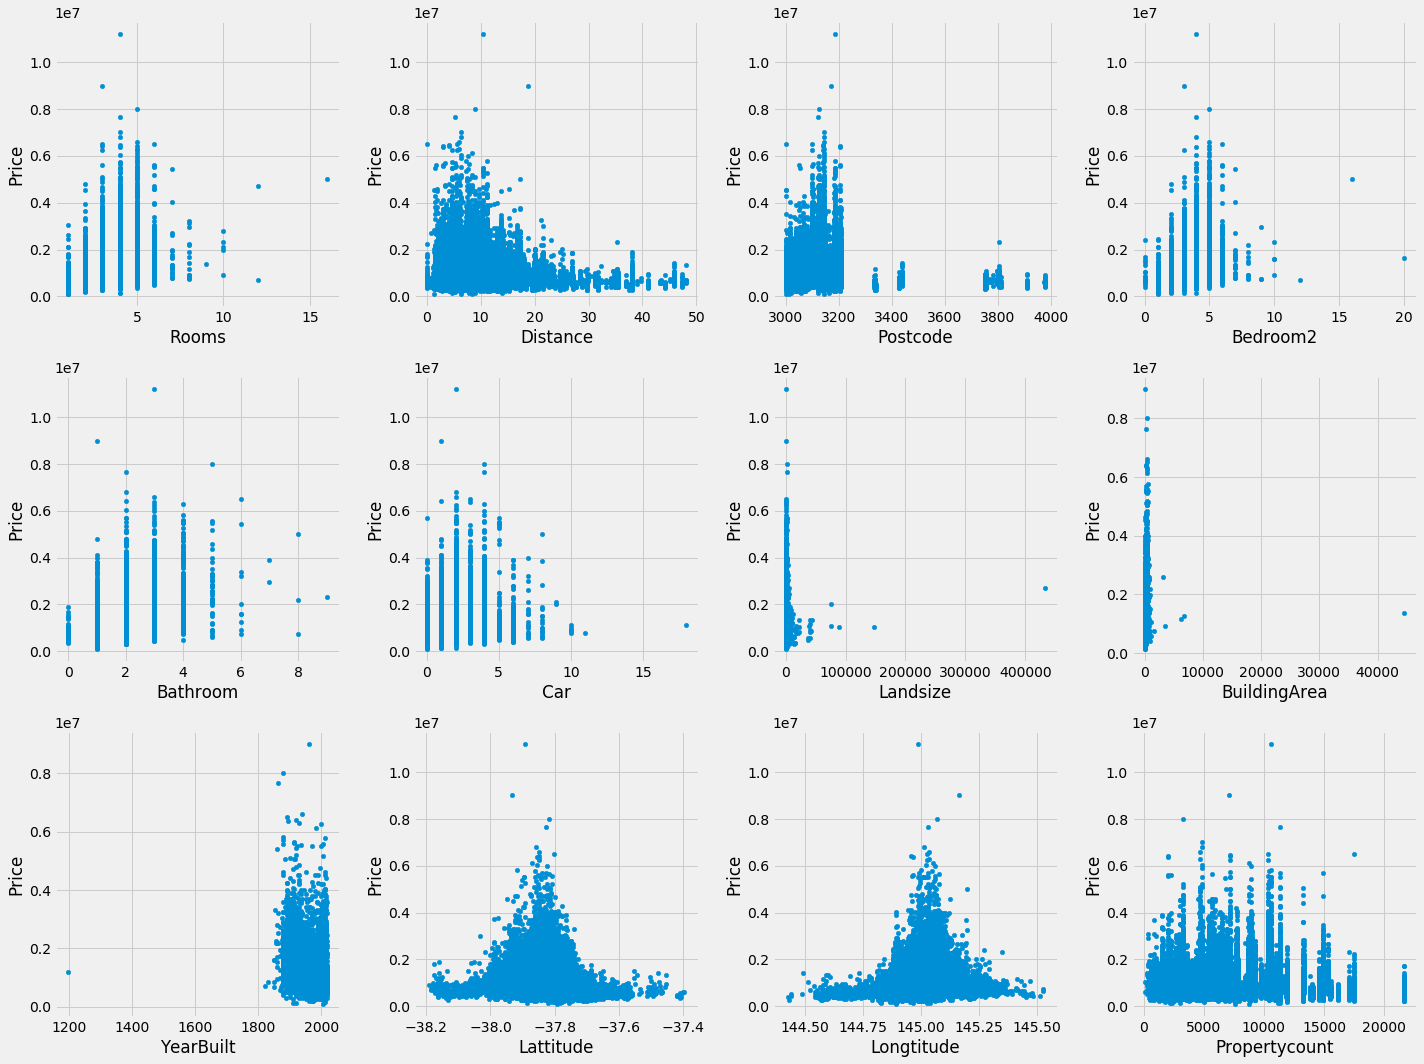

In [17]:
if 'Price' in num:
    num.remove('Price')
else:
    pass

fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(20,15))

for i in range(len(num)):
    df.plot(x = num[i], y = 'Price', kind='scatter'
            , ax = axes[i//4,i%4])
    #axes[i//4,i%4].set_title(num[i])

plt.tight_layout();

In [18]:
df['Type'].unique()

array(['h', 'u', 't'], dtype=object)

In [19]:
price = df.groupby(['Date', 'Type'])[['Price']].mean().reset_index()
price['Date'] = pd.to_datetime(price['Date'], format='%d/%m/%Y')

price.head(5)

,Date,Type,Price
0,2017-07-01,h,1.023303e+06
1,2017-07-01,t,8.059767e+05
2,2017-07-01,u,5.878747e+05
3,2018-02-10,h,8.815972e+05
4,2018-02-10,t,7.932297e+05


In [ ]:
#так себе вариант визуализации, ниже поинтереснее
plt.figure(figsize=(10,8))
plt.style.use('classic')
sns.pointplot(x = 'Date', y ='Price', data = price, hue = 'Type')
plt.xticks(rotation=90)
;

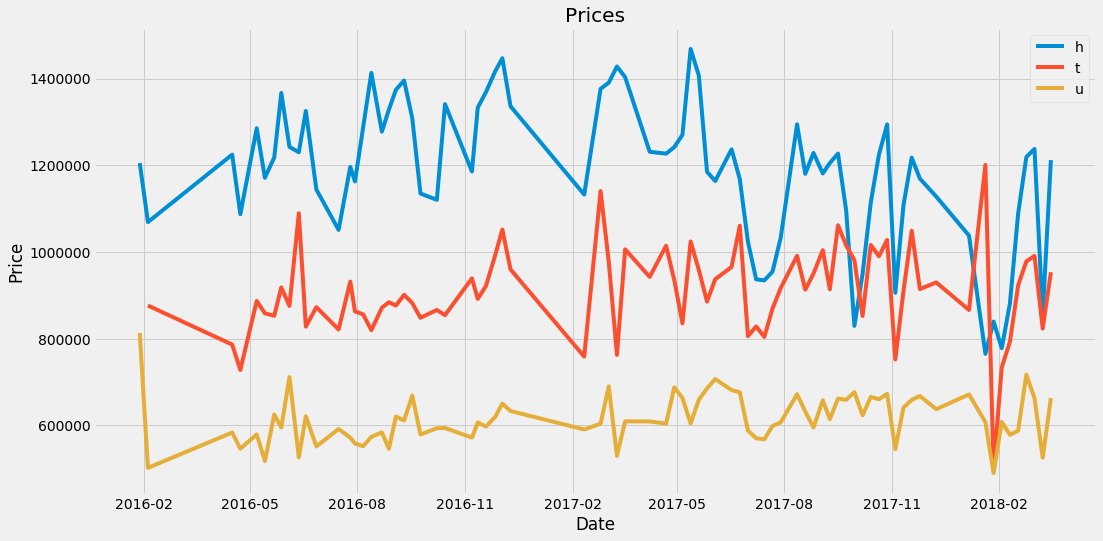

In [20]:
pivot_price = price.pivot_table(values = 'Price', index = 'Date', columns = 'Type', aggfunc = np.mean)

plt.figure(figsize = (16,8))

for i in list(pivot_price.columns):
    sns.lineplot(data = pivot_price[i], label = i)
plt.ylabel('Price')
plt.xlabel('Date')
plt.title('Prices');

Видно, что по жилью типа h цены снизились с середины 2017. В остальном, очевидного тренда нет. В будущем, я планирую разбить дату объявления на несколько фичей (например год и месяц).

## Пропуски в данных

Для начала, оценю долю пропусков в целевой переменной, цене:

In [22]:
print('Target missed values: ', df['Price'].isnull().mean().round(4)*100, '%')

Target missed values:  21.83 %


Удалю эти данные, буду оперировать только размеченными.

In [23]:
df2 = df[df['Price'].notnull()]
df2.isnull().mean().round(2)

Suburb           0.00
Address          0.00
Rooms            0.00
Type             0.00
Price            0.00
Method           0.00
SellerG          0.00
Date             0.00
Distance         0.00
Postcode         0.00
Bedroom2         0.24
Bathroom         0.24
Car              0.25
Landsize         0.34
BuildingArea     0.61
YearBuilt        0.56
CouncilArea      0.00
Lattitude        0.23
Longtitude       0.23
Regionname       0.00
Propertycount    0.00
dtype: float64

In [24]:
#сокращаю адрес до названия улицы, это нужно для заполнения пропусков по координатам.
df2['Address'] = df2['Address'].apply(lambda x:' '.join(x.split()[1:]))
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0


In [22]:
#оставлю только данные без пропусков
df_c = df2[['Suburb','Address','Postcode','Lattitude','Longtitude','Distance']].dropna()
df_c.head()

,Suburb,Address,Postcode,Lattitude,Longtitude,Distance
1,Abbotsford,Turner St,3067.0,-37.7996,144.9984,2.5
2,Abbotsford,Bloomburg St,3067.0,-37.8079,144.9934,2.5
4,Abbotsford,Charles St,3067.0,-37.8093,144.9944,2.5
5,Abbotsford,Federation La,3067.0,-37.7969,144.9969,2.5
6,Abbotsford,Park St,3067.0,-37.8072,144.9941,2.5


Заполнять буду в порядке убывания точности: Адрес, Район, Индекс

In [23]:
df_c.groupby(['Postcode'])['Suburb'].nunique().sort_values(ascending=False).head(5)
#в по одному индексу может быть до 6 районов, следовательно, район точнее

Postcode
3977.0    6
3195.0    5
3023.0    5
3020.0    4
3084.0    4
Name: Suburb, dtype: int64

In [24]:
#функций для замены пропуска координат по убыванию точности: адрес- район- индекс
def coor_fixer(data, i):
    if not pd.isnull(data[i]):
        return(data[i])
    elif data['Address'] in df_c['Address'].values:
        return df_c[df_c['Address'] == data['Address']][i].median()
    elif data['Suburb'] in df_c['Suburb'].values:
        return df_c[df_c['Suburb'] == data['Suburb']][i].median()
    elif data['Postcode'] in df_c['Postcode'].values:
        return df_c[df_c['Postcode'] == data['Postcode']][i].median()
    else:
        print('coordinates not found') #на случай отсутсвия координат по всей цепочке

In [25]:
#применю написанную функцию для численных показателей, имеющих пропуски
for x in ['Lattitude','Longtitude','Distance','Postcode']:
    df2[x] = df2.apply(coor_fixer, axis = 1, i = x)

coordinates not found
coordinates not found


In [ ]:
#df2['isnull'] = df2['Lattitude'].isnull()

In [26]:
#удалю bedrooms2 из-за большого кол-ва пропусков и скореллированности с кол-вом комнтат (rooms)

df2.drop('Bedroom2', axis = 1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27247 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27247 non-null object
Address          27247 non-null object
Rooms            27247 non-null int64
Type             27247 non-null object
Price            27247 non-null float64
Method           27247 non-null object
SellerG          27247 non-null object
Date             27247 non-null object
Distance         27247 non-null float64
Postcode         27247 non-null float64
Bathroom         20800 non-null float64
Car              20423 non-null float64
Landsize         17982 non-null float64
BuildingArea     10656 non-null float64
YearBuilt        12084 non-null float64
CouncilArea      27244 non-null object
Lattitude        27246 non-null float64
Longtitude       27246 non-null float64
Regionname       27244 non-null object
Propertycount    27244 non-null float64
dtypes: float64(11), int64(1), object(8)
memory usage: 4.4+ MB


In [27]:
df2.isnull().mean()

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bathroom         0.236613
Car              0.250450
Landsize         0.340037
BuildingArea     0.608911
YearBuilt        0.556502
CouncilArea      0.000110
Lattitude        0.000037
Longtitude       0.000037
Regionname       0.000110
Propertycount    0.000110
dtype: float64

В колонках BuildingArea и YearBuilt слишком много пропусков. Попробую 2 варианта: заполню их медианным значением по цепочке адрес-...-тип жилья  (по убыванию точности) и попробую просто удалить их.     

In [28]:
df_c2 = df2[['Suburb', 'Address', 'Postcode', 'Type', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Propertycount']].dropna()
df_c2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8895 entries, 2 to 34856
Data columns (total 10 columns):
Suburb           8895 non-null object
Address          8895 non-null object
Postcode         8895 non-null float64
Type             8895 non-null object
Bathroom         8895 non-null float64
Car              8895 non-null float64
Landsize         8895 non-null float64
BuildingArea     8895 non-null float64
YearBuilt        8895 non-null float64
Propertycount    8895 non-null float64
dtypes: float64(7), object(3)
memory usage: 764.4+ KB


In [29]:
#аналогичная функция для заполнения пропусков медианой, добавил тип жилья
def val_fixer(data, i):
    if not pd.isnull(data[i]):
        return data[i]
    elif data['Address'] in df_c2['Address'].values:
        return df_c2[df_c2['Address'] == data['Address']][i].median()
    elif data['Suburb'] in df_c2['Suburb'].values:
        return df_c2[df_c2['Suburb'] == data['Suburb']][i].median()
    elif data['Postcode'] in df_c2['Postcode'].values:
        return df_c2[df_c2['Postcode'] == data['Postcode']][i].median()
    elif data['Type'] in df_c2['Type'].values:
        return df_c2[df_c2['Type'] == data['Type']][i].median()
    else:
        print('data not found')

In [ ]:
for x in ['Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt','Propertycount']:
    df2[x] = df2.apply(val_fixer, axis = 1, i = x)

In [31]:
df2.isnull().mean()

Suburb           0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Date             0.000000
Distance         0.000000
Postcode         0.000000
Bathroom         0.000000
Car              0.000000
Landsize         0.000000
BuildingArea     0.000000
YearBuilt        0.000000
CouncilArea      0.000110
Lattitude        0.000037
Longtitude       0.000037
Regionname       0.000110
Propertycount    0.000000
dtype: float64

In [ ]:
postcodes = list(df2[df2.isnull().any(axis = 1)]['Postcode'])

In [ ]:
regionnames = []
councilareas = []
for i in postcodes:
    regionnames.append(df2[df2['Postcode'] == i]['Regionname'].unique()[0])
    councilareas.append(df2[df2['Postcode'] == i]['CouncilArea'].unique()[0])

In [ ]:
lastnulls = list(df2[df2.isnull().any(axis = 1)].index)

for i in range(len(lastnulls)):
    df2.loc[lastnulls[i], 'Regionname'] = regionnames[i]
    df2.loc[lastnulls[i], 'CouncilArea'] = councilareas[i]

In [32]:
df2.dropna(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27243 entries, 1 to 34856
Data columns (total 20 columns):
Suburb           27243 non-null object
Address          27243 non-null object
Rooms            27243 non-null int64
Type             27243 non-null object
Price            27243 non-null float64
Method           27243 non-null object
SellerG          27243 non-null object
Date             27243 non-null object
Distance         27243 non-null float64
Postcode         27243 non-null float64
Bathroom         27243 non-null float64
Car              27243 non-null float64
Landsize         27243 non-null float64
BuildingArea     27243 non-null float64
YearBuilt        27243 non-null float64
CouncilArea      27243 non-null object
Lattitude        27243 non-null float64
Longtitude       27243 non-null float64
Regionname       27243 non-null object
Propertycount    27243 non-null float64
dtypes: float64(11), int64(1), object(8)
memory usage: 4.4+ MB


Пропусков не осталось, проанализирую данные на выбросы и адекватность.

IndexError: list index out of range

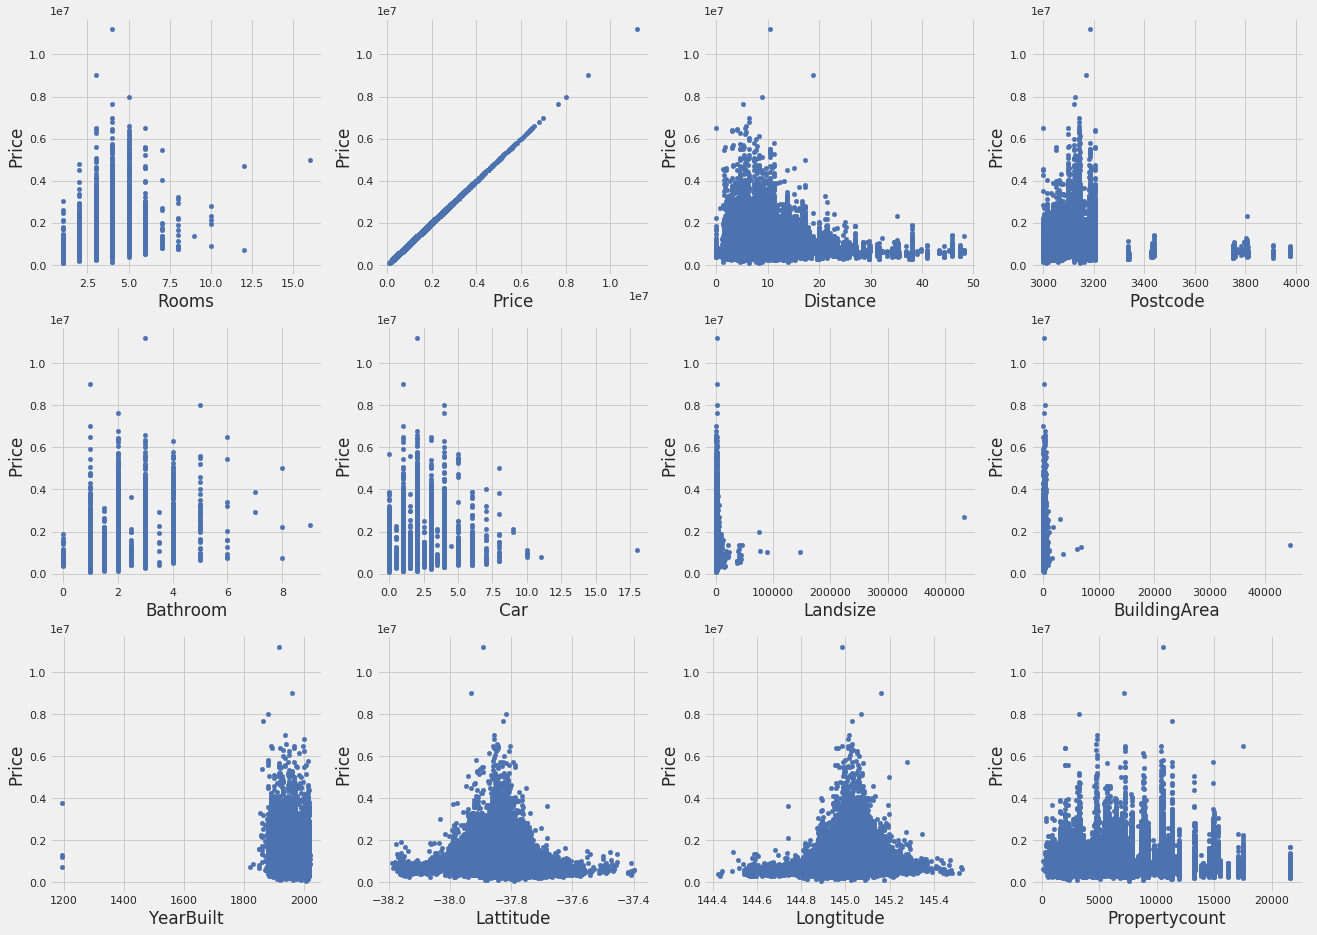

In [34]:
if 'Bedroom2' in num:
    num.remove('Bedroom2')
else:
    pass

fig, axes = plt.subplots(ncols = 4, nrows = 3, figsize=(20,15))

for i in range(len(df2[num])):
    df2.plot(x = num[i], y = 'Price', kind='scatter'
            , ax = axes[i//4,i%4])
    #axes[i//4,i%4].set_title(num[i])

plt.tight_layout();

In [35]:
df2.loc[df2['YearBuilt']<1800, ['YearBuilt']] = df2['YearBuilt'].median()
df2.loc[df2['BuildingArea'] == df2['BuildingArea'].max(), ['BuildingArea']] = df2['BuildingArea'].median()
df2.loc[df2['Landsize'] == df2['Landsize'].max(), ['Landsize']] = df2['Landsize'].median()

Теперь данные выглядят более адекватно, можно приступить к построению модели.

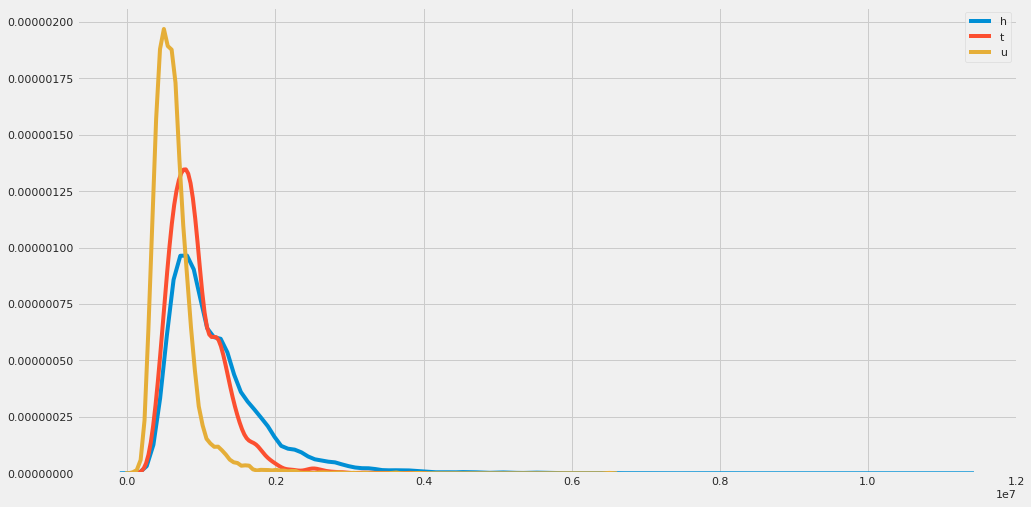

In [36]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (15,8))
for i in list(df2['Type'].unique()):
    sns.kdeplot(df2[df2['Type'] == i]['Price'], label = i)

In [37]:
def dist_plot(df, param):
    plt.style.use('fivethirtyeight')
    plt.figure(figsize = (15,8))
    for i in list(df[param].unique()):
        sns.kdeplot(df[df[param] == i]['Price'], label = i)

In [38]:
df2[cat].nunique()

Suburb          343
Address        9525
Type              3
Method            5
SellerG         349
Date             78
CouncilArea      33
Regionname        8
dtype: int64

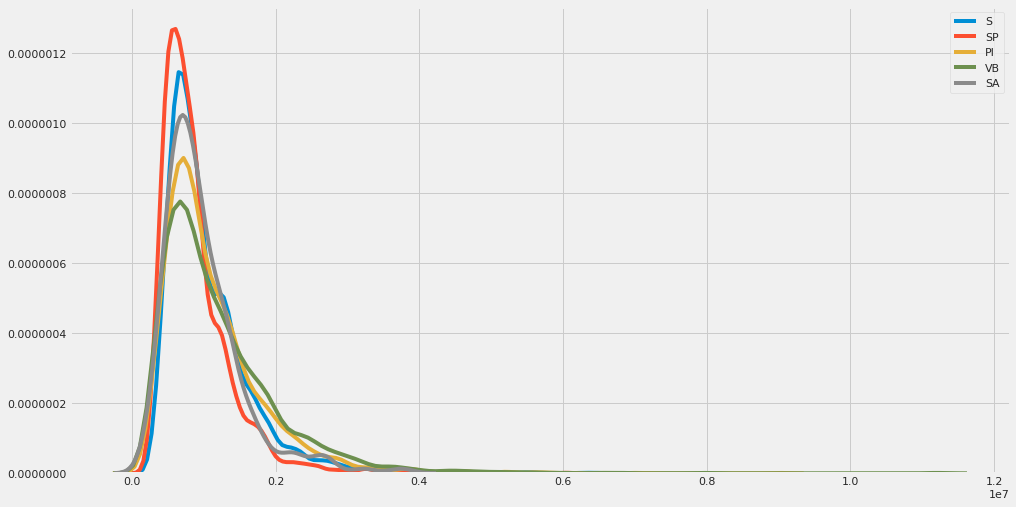

In [39]:
dist_plot(df2, 'Method')

In [40]:
#вместо даты оставлю год и месяц
df2['Date'] = pd.to_datetime(df2['Date'], format='%d/%m/%Y')

df2['Month'] = df2['Date'].dt.month
df2['Year'] = df2['Date'].dt.year

df2.drop('Date', axis = 1, inplace=True)

In [41]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Month,Year
1,Abbotsford,Turner St,2,h,1480000.0,S,Biggin,2.5,3067.0,1.0,...,202.0,85.0,1965.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,12,2016
2,Abbotsford,Bloomburg St,2,h,1035000.0,S,Biggin,2.5,3067.0,1.0,...,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2,2016
4,Abbotsford,Charles St,3,h,1465000.0,SP,Biggin,2.5,3067.0,2.0,...,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,3,2017
5,Abbotsford,Federation La,3,h,850000.0,PI,Biggin,2.5,3067.0,2.0,...,94.0,119.0,2004.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,3,2017
6,Abbotsford,Park St,4,h,1600000.0,VB,Nelson,2.5,3067.0,1.0,...,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,6,2016


## Подготовка данных для модели

In [42]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


if 'Date' in cat:
    cat.remove('Date')
else:
    pass

df2[cat] = df2[cat].apply(LabelEncoder().fit_transform)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27243 entries, 1 to 34856
Data columns (total 21 columns):
Suburb           27243 non-null int64
Address          27243 non-null int64
Rooms            27243 non-null int64
Type             27243 non-null int64
Price            27243 non-null float64
Method           27243 non-null int64
SellerG          27243 non-null int64
Distance         27243 non-null float64
Postcode         27243 non-null float64
Bathroom         27243 non-null float64
Car              27243 non-null float64
Landsize         27243 non-null float64
BuildingArea     27243 non-null float64
YearBuilt        27243 non-null float64
CouncilArea      27243 non-null int64
Lattitude        27243 non-null float64
Longtitude       27243 non-null float64
Regionname       27243 non-null int64
Propertycount    27243 non-null float64
Month            27243 non-null int64
Year             27243 non-null int64
dtypes: float64(11), int64(10)
memory usage: 4.6 MB


In [43]:
X = df2.drop('Price', axis = 1)
y = df2['Price']

rs = 17

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = rs)

In [44]:
print('y_test median: ', y_test.median(), 'y_train median: ', y_train.median()), \
print('y_test mean: ', y_test.mean(), 'y_train mean: ', y_train.mean());

y_test median:  875000.0 y_train median:  870000.0
y_test mean:  1048641.283494433 y_train mean:  1050892.6019926586


## Построение моделей

In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [46]:
tree = DecisionTreeRegressor(random_state=rs)
tree.fit(X_train, y_train)
mean_squared_error(y_test,tree.predict(X_test)), \
mean_absolute_error(y_test,tree.predict(X_test))

(175857575870.78406, 240013.98433867612)

In [47]:
def fit_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    return(np.mean(np.abs(pred - y_test)) / y_test.mean(),
           mean_absolute_error(y_test, model.predict(X_test)))

In [48]:
fit_model(LinearRegression(),X_train, X_test, y_train, y_test)

(0.25990230125425634, 272544.28277042025)

In [49]:
fit_model(RandomForestRegressor(random_state=rs),X_train, X_test, y_train, y_test)

(0.1727519674640005, 181154.84488763814)

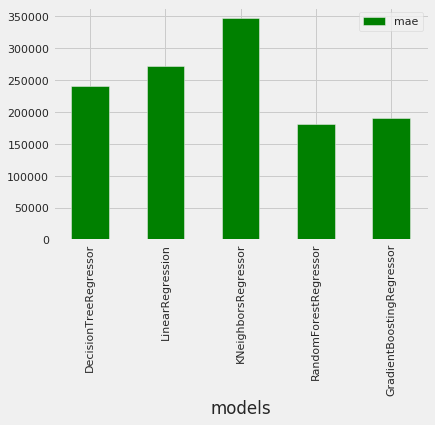

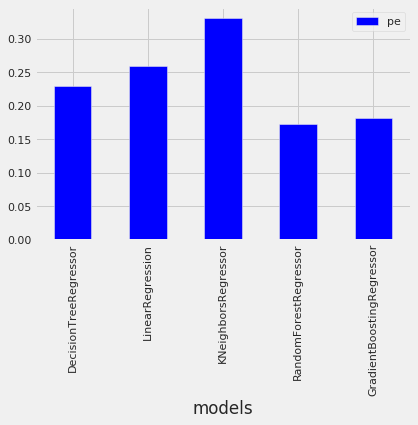

In [50]:
models = [
    DecisionTreeRegressor(random_state=rs),
    LinearRegression(),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=rs),
    GradientBoostingRegressor(random_state=rs)
]

model_names = []
pe = []
mae = []

for model in models:
    m = str(model)
    model_names.append(m[:m.index('(')])
    m_pe = fit_model(model, X_train, X_test, y_train, y_test)[0]
    m_mae = fit_model(model, X_train, X_test, y_train, y_test)[1]
    mae.append(m_mae)
    pe.append(m_pe)
    
base_results = pd.DataFrame({'models':model_names, 'pe':pe, 'mae':mae})
plt.figure(figsize=(15,10))

base_results.plot(x = 'models', y = 'mae', kind = 'bar', color = 'green');
base_results.plot(x = 'models', y = 'pe', kind = 'bar', color = 'blue')

In [51]:
base_results.head().round(4).set_index('models').sort_values(by='pe')

,mae,pe
models,,
RandomForestRegressor,181154.8449,0.1728
GradientBoostingRegressor,191123.2686,0.1823
DecisionTreeRegressor,240013.9843,0.2289
LinearRegression,272544.2828,0.2599
KNeighborsRegressor,347307.7230,0.3312


RF и GB дали результат лучше на дефолтных параметрах. Для них буду подбирать гиперпараметры:

In [65]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV, StratifiedKFold

rf_params = {'n_estimators' : [150,200,250,300,350],
            'max_depth': [25,30,35,40],
            'min_samples_leaf': [1,2,4,6,8,10],
            'min_samples_split' : [2, 4, 6, 10],
            'max_features' : ['auto', 'sqrt', 'log2', None]}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=rs), param_distributions = rf_params, cv = 5,
                              n_iter=25, verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 8, random_state = rs)

fit_model(rf_grid, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   48.7s
[Parallel(n_jobs=8)]: Done 125 out of 125 | elapsed:  3.6min finished


(0.159543683844253, 167304.09339986803)

In [66]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 200}

In [67]:
#теперь пройдусь по параметрам с помощью GridSearchCV

rf_params = {'n_estimators' : np.arange(180,220),
            'max_depth': np.arange(27,33),
            'min_samples_leaf': [1,2],
            'min_samples_split' : [4,5,6],
            'max_features' : ['sqrt']}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = GridSearchCV(RandomForestRegressor(random_state=rs), rf_params, cv = 5,
                             verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 4)

fit_model(rf_grid, X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 46.4min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 62.6min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 82.4min
[Parallel(n_jobs=4)]: Done 4042 tasks      | elapsed: 104.1min
[Parallel(n_jobs=4)]: Done 4992 tasks      | elapsed: 128.4min
[Parallel(n_jobs=4)]: Done 6042 tasks      | elapsed: 155.0min
[Parallel(n_jobs=4)]: Done 7192 tasks      | elapsed: 184.4min
[Parallel(n_jobs=4)]: Done 7200 out of 7200 | elapsed: 184.7min finished


(0.1598314181874861, 167605.82351086134)

In [68]:
rf_grid.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 180}

In [ ]:
feat_importance = pd.DataFrame(X_train.columns, columns = ['features'])
feat_importance['value'] = rf_grid.best_estimator_.feature_importances_
feat_importance.sort_values(by='value', ascending = False)

In [ ]:
f_impt=pd.DataFrame({'value':rf_grid.best_estimator_.feature_importances_,
                     'features':X_test.columns}).sort_values(by='value', ascending = False)
f_impt.head()

In [ ]:
plt.figure(figsize = (12,8))

f_impt.plot(x = 'features',kind = 'bar')
plt.title('Feature importances');

Модель ошибается на 16%. Улучшить результат попробую удалив признаки, в которых было очень много пропусков (ибо вероятно, я заполнил их некорректно)

In [ ]:
X_test2 = X_test.drop(['BuildingArea', 'YearBuilt'], axis = 1)
X_train2 = X_train.drop(['BuildingArea', 'YearBuilt'], axis = 1)

In [ ]:
fit_model(rf_grid.best_estimator_, X_train2, X_test2, y_train, y_test)

In [ ]:
f_impt=pd.DataFrame({'value':rf_grid.best_estimator_.feature_importances_,
                     'features':X_test2.columns}).sort_values(by='value', ascending = False)
f_impt.head()

In [ ]:
plt.figure(figsize = (12,8))

f_impt.plot(x = 'features',kind = 'bar')
plt.title('Feature importances');

Результат чуть улучшился, следовательно, танцы с бубном для заполнения пропусков того не стоили.
## Дальнейшие шаги:
Cделать отдельные модели для разных типов жилья. Вероятнее всего, такой подход даст лучший результат. Как минимум, это выглядит достаточно логично для того, чтобы попробовать.

In [ ]:
df2.head()

In [ ]:
df2['Type'].unique()

In [ ]:
df2_0 = df2[df2['Type'] == 0]
df2_1 = df2[df2['Type'] == 1]
df2_2 = df2[df2['Type'] == 2]
df2_0.shape, df2_1.shape, df2_2.shape

In [ ]:
X0 = df2_0.drop(['Price','BuildingArea', 'YearBuilt'], axis = 1)
y0 = df2_0['Price']

X0_train, X0_test, y0_train, y0_test = train_test_split(X0, y0, test_size = 0.3, random_state = rs)

In [ ]:
models = [
    DecisionTreeRegressor(random_state=rs),
    LinearRegression(),
    KNeighborsRegressor(),
    RandomForestRegressor(random_state=rs),
    GradientBoostingRegressor(random_state=rs)
]

model_names = []
pe = []
mae = []

for model in models:
    m = str(model)
    model_names.append(m[:m.index('(')])
    m_pe = fit_model(model, X0_train, X0_test, y0_train, y0_test)[0]
    m_mae = fit_model(model, X0_train, X0_test, y0_train, y0_test)[1]
    mae.append(m_mae)
    pe.append(m_pe)
    
base_results = pd.DataFrame({'models':model_names, 'pe':pe, 'mae':mae})
plt.figure(figsize=(15,10))

base_results.plot(x = 'models', y = 'mae', kind = 'bar', color = 'green');
base_results.plot(x = 'models', y = 'pe', kind = 'bar', color = 'blue')

In [ ]:
base_results.set_index('models').sort_values(by = 'pe', ascending = True)

In [ ]:
rf_params = {'n_estimators' : [10,50,100,200,300],
            'max_depth': [2,3,5,10,15,20],
            'min_samples_leaf': [1,2,4,6,8,10],
            'min_samples_split' : [2, 4, 6, 10],
            'max_features' : ['auto', 'sqrt', 'log2', None]}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=rs), param_distributions = rf_params, cv = 5,
                              n_iter=25, verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 8, random_state = rs)

fit_model(rf_grid, X0_train, X0_test, y0_train, y0_test)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_params = {'n_estimators' : [200,300,400,500],
            'max_depth': [2,3,5,10,15,20],
            'min_samples_leaf': [1,2,4,6,8,10],
            'min_samples_split' : [2, 4, 6, 10],
            'max_features' : ['auto', 'sqrt', 'log2', None]}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=rs), param_distributions = rf_params, cv = 5,
                              n_iter=25, verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 8, random_state = rs)

fit_model(rf_grid, X0_train, X0_test, y0_train, y0_test)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_params = {'n_estimators' : [440,450,460],
            'max_depth': [30,35,40],
            'min_samples_leaf': [3,4],
            'min_samples_split' : [3,4,5],
            'max_features' : ['auto']}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = RandomizedSearchCV(RandomForestRegressor(random_state=rs), param_distributions = rf_params, cv = 5,
                              n_iter=10, verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 8, random_state = rs)

fit_model(rf_grid, X0_train, X0_test, y0_train, y0_test)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_params = {'n_estimators' : np.arange(440,480,10),
            'max_depth': np.arange(40,70,10),
            'min_samples_leaf' : [3],
            'min_samples_split' : [5, 10],
            'max_features' : ['auto']}

#skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = rs)
rf_grid = GridSearchCV(RandomForestRegressor(random_state=rs), rf_params, cv = 5,
                               verbose = True, scoring = 'neg_mean_squared_error', n_jobs = 8)

fit_model(rf_grid, X0_train, X0_test, y0_train, y0_test)